In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams
import seaborn as sns

folder_path = "C:/Users/heung/OneDrive/Documents/scData/14. GSE136001_RAW/"

In [3]:
# Load file
adata = sc.read(folder_path + "integrated_2.h5ad")
adata.obs.head(5)

,sample,sex,condition,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type
AAACCTGAGAGGTTAT-1,GSM4039241_f-ctrl-1-filtered,female,normal,988,1863.0,2.200752,5.797101,0,0,2,5.367686,Homeo MG
AAACCTGCAATGGATA-1,GSM4039241_f-ctrl-1-filtered,female,normal,1681,3707.0,0.998112,6.986782,0,0,4,2.697599,Transcrip MG
AAACCTGCACAGATTC-1,GSM4039241_f-ctrl-1-filtered,female,normal,1220,2472.0,0.404531,9.061488,0,0,8,4.045308,Transcrip MG
AAACGGGAGGTGACCA-1,GSM4039241_f-ctrl-1-filtered,female,normal,978,2030.0,2.266010,8.374384,0,0,1,4.926108,Transcrip MG
AAACGGGCATCGGACC-1,GSM4039241_f-ctrl-1-filtered,female,normal,1095,2075.0,2.361446,8.192771,0,0,0,4.819277,Homeo MG


# UMAP

## UMAP background color

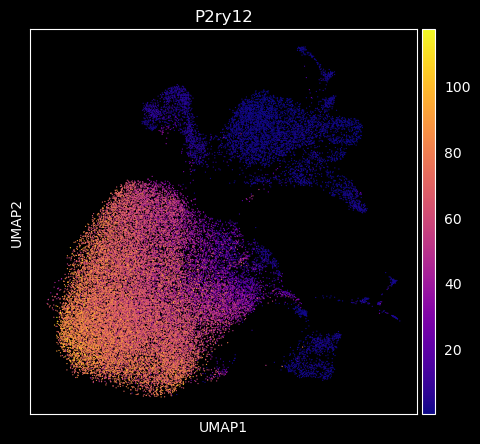

In [30]:
# Figure size 조정
rcParams['figure.figsize'] = (5.5, 5)   # Figure size, (width, height) in inches

# 실제 UMAP 그리기
sc.pl.umap(
    adata,
    color = ['P2ry12'],
    # frameon = False,
    layer = 'scvi_normalized',
    color_map = 'plasma',
    show = False
)


# 이하 꾸밈 요소 ==========================================================================================================
fig, ax = plt.gcf(), plt.gca()

fig.set_facecolor('black')  # 테두리 바깥 배경색 변경. frameon = False라면 전체 배경색 변경
ax.set_facecolor('black')    # 테두리 안 배경색 변경

# 축과 텍스트 색상 변경
ax.spines['bottom'].set_color('white')  # 아래쪽 축 색상 변경
ax.spines['left'].set_color('white')    # 왼쪽 축 색상 변경
ax.spines['top'].set_color('white')     # 위쪽 축 색상 변경
ax.spines['right'].set_color('white')   # 오른쪽 축 색상 변경

ax.xaxis.label.set_color('white')       # x축 레이블 색상 변경
ax.yaxis.label.set_color('white')       # y축 레이블 색상 변경
ax.tick_params(axis='x', colors='white') # x축 눈금 색상 변경
ax.tick_params(axis='y', colors='white') # y축 눈금 색상 변경
ax.title.set_color('white')             # 제목 색상 변경

# legend 색상 변경 # Colorbar는 legend가 아님
legend = ax.legend_
if legend:
    frame = legend.get_frame()
    frame.set_facecolor('white')  # legend 배경색 변경
    frame.set_edgecolor('white')  # legend 테두리색 변경
    for text in legend.get_texts():
        text.set_color('white')   # legend 텍스트 색상 변경

# color bar 색상 변경
cbar = ax.collections[-1].colorbar  # color bar 객체 가져오기
cbar.outline.set_edgecolor('white')  # color bar 테두리 색상 변경
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')  # color bar 텍스트 색상 변경


plt.show()

## UMAP Split by condition

In [14]:
# refernece: https://github.com/scverse/scanpy/issues/2333
def split_umap(adata, split_by, ncol = 2, nrow = None, figsize = None, **kwargs):   # **kwargs에는 sc.pl.umap에 들어가는 다른 인자들을 넣어줄 수 있음
    categories = adata.obs[split_by].cat.categories
    if nrow is None:
        nrow = int(np.ceil(len(categories) / ncol))
    
    if figsize is None:
        figsize = (ncol * 4, nrow * 3.7)
    fig, axs = plt.subplots(nrow, ncol, figsize = figsize)
    axs = axs.flatten()
    
    
    for i, cat in enumerate(categories):
        ax = axs[i]
        sc.pl.umap(adata[adata.obs[split_by] == cat], ax = ax, show = False, title = cat, **kwargs)
    plt.tight_layout()

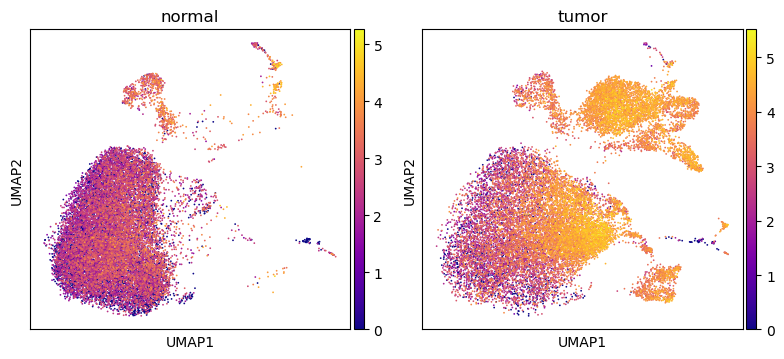

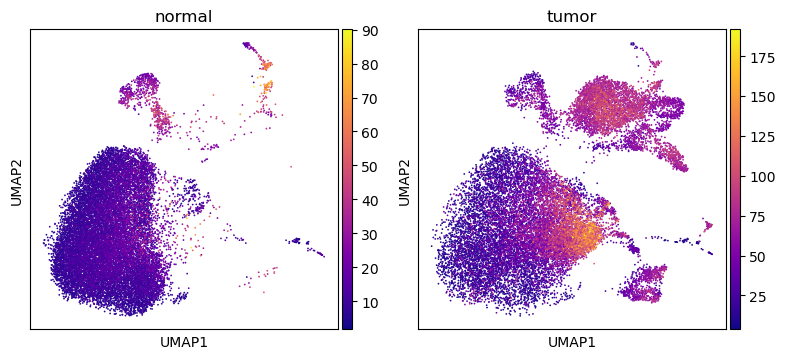

In [27]:
split_umap(adata, color = ['H2-D1'], split_by = 'condition', frameon = True, color_map = 'plasma')
split_umap(adata, color = ['H2-D1'], split_by = 'condition', frameon = True, color_map = 'plasma', layer = 'scvi_normalized')
# split_umap(adata, color = ['Tcf7'], split_by = 'sample', frameon = True)
# split_umap(adata, color = ['Tcf7'], split_by = 'cell type', frameon = True)   # 비추. 만약 쓸 경우 column name이 cell type이 아니라 cell_type일 수도 있음

# ViolinPlot

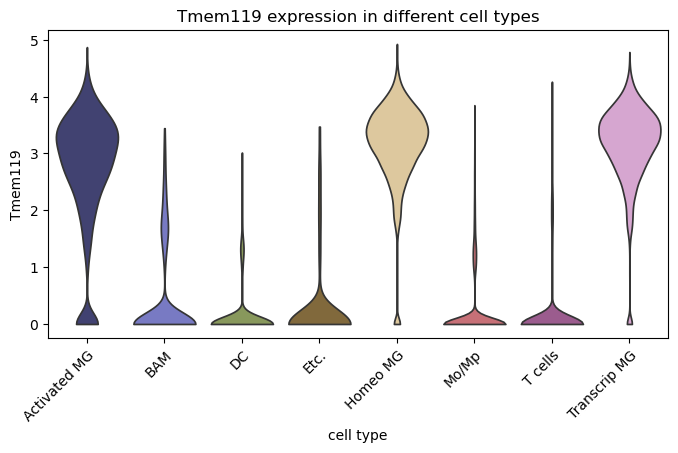

In [69]:
fig, ax = plt.subplots(figsize = (8, 4))

sc.pl.violin(
    adata,
    keys = ['Tmem119'],
    groupby = 'cell_type',
    # jitter = 0.4,             # raw 점들의 분산 정도
    stripplot = False,          # False: raw dot 표시 안함. True: raw dot 표시
    # size = 1.5,               # raw dot 크기
    ax = ax,                    # 위에서 만든 ax에 그림
    show = False,
)

# 꾸밈 요소
plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right')   # x 축 레이블 회전
plt.title('Tmem119 expression in different cell types') # 제목

plt.show()

C:\Users\heung\AppData\Local\Temp\ipykernel_18184\3799670721.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cell_type'] = df['cell_type'].cat.remove_unused_categories()
C:\Users\heung\AppData\Local\Temp\ipykernel_18184\3799670721.py:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


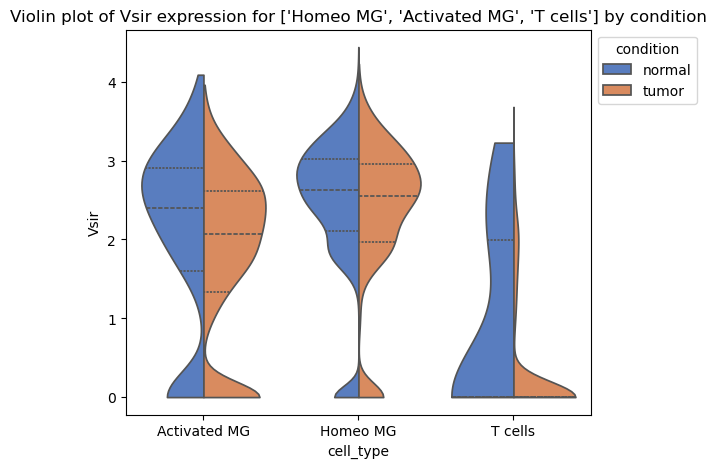

In [67]:
gene = 'Vsir'  # 예제 유전자 이름
selected_cell_types = ['Homeo MG', 'Activated MG', 'T cells']  # 원하는 세포 유형

# 유전자 발현 데이터를 obs 데이터프레임에 추가
tdata = adata.copy()
tdata.obs[gene] = tdata[:, gene].X.toarray().flatten()

# 해당 세포 유형에 해당하는 데이터 필터링. 안하면 많이 안이쁨
df = tdata.obs[tdata.obs['cell_type'].isin(selected_cell_types)]
df['cell_type'] = df['cell_type'].cat.remove_unused_categories()

# figure size 조정
plt.figure(figsize=(6, 5))

# Violin plot 생성
ax = sns.violinplot(
    data = df,
    x = 'cell_type',
    y = gene,
    hue = 'condition',
    split = True,
    inner = 'quartile', # 'box', 'quartile', 'point', 'stick', None
    palette = "muted",
    scale = "width",
    cut = 0    # cut = 0이면 max, min 범위까지만 그림. 아니면 약간 확장해줌
)

sns.move_legend(ax, loc = 'upper left', bbox_to_anchor = (1, 1), title = 'condition')  # legend 위치 조정

plt.title(f'Violin plot of {gene} expression for {selected_cell_types} by condition')
# plt.xticks(rotation = 45)  # x축 레이블 회전. x label이 겹칠 경우 사용
del tdata, df
plt.show()